Create a UnionPeakset for active enhancer calls from the uniform processing pipeline for the 3 assays and then create heatmaps, profile plots

Active calls:
    
`/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed`
`/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/merged_enhancer_peaks_in_either_orientation.bed`
`/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed`

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/

In [ ]:
%%bash
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed \
-b /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/merged_enhancer_peaks_in_either_orientation.bed \
| head 

In [ ]:
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed \

In [ ]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/merged_enhancer_peaks_in_either_orientation.bed /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed

In [ ]:
%%bash
bedtools multiinter -i \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/merged_enhancer_peaks_in_either_orientation.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed \
-header \
-names ASTARR LentiMPRA wgSTARR \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_all_merged_enhancer_peak_in_each_orientation.txt

In [ ]:
import pandas as pd

unionset = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_all_merged_enhancer_peak_in_each_orientation.txt', sep='\t')
unionset[['chrom','start','end']][unionset['num']==3].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed', sep='\t', index=False, header=None)

### Heatmaps with common background peaks for active unionset set peaks

Common backgrounds peaks: `/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/inputs/intersections/ASTARR_Lenti_wgSTARR_inactive_with_input.threshold0.5.coordinates_corrected.GC_content.txt`


In [ ]:
%%bash
bedtools nuc -fi /data/reddylab/Reference_Data/Genomes/hg38/hg38.fa \
-bed /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.GC_content.txt

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.GC_content.txt

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

active = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.GC_content.txt', sep='\t')
inactive = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/inputs/intersections/ASTARR_Lenti_wgSTARR_inactive_with_input.threshold0.5.coordinates_corrected.GC_content.txt', sep='\t')

##########################
### before GC matching ###
##########################

plt.figure(figsize=(10,8))
sns.distplot(inactive['8_pct_gc'], bins=100, kde=True, color='darkblue', label='inactive_peaks')
sns.distplot(active['5_pct_gc'], bins=100, kde=True, color='red', label="active_peaks")
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()

###################
### GC matching ###
###################

random.seed(42)
df=None

count_active, bin_edge_active = np.histogram(active['5_pct_gc'], bins = 100)

sample_size = ((count_active.astype(int)/sum(count_active))*3000).astype(int)
for i in range(0,100):
    bin_start = bin_edge_active[i]
    bin_stop = bin_edge_active[i+1]
    all_inactive_peaks_v1 = inactive[(inactive['8_pct_gc']>=bin_start)&(inactive['8_pct_gc']<bin_stop)].reset_index()
    all_inactive_peaks_v1.drop(columns='index', inplace=True)
    
    count_active = count_active.astype(int)
    m = list(range(0, sample_size[i]))
    
    if not all_inactive_peaks_v1.empty:
        all_inactive_peaks_random = all_inactive_peaks_v1.loc[m]
        
        if df is None:
            df = all_inactive_peaks_random
        else:
            df = pd.concat([df,all_inactive_peaks_random])  

# df[['chr','start','end']] = df['peak'].str.split('_', expand=True)
df = df.dropna().astype({'2_usercol':'int', '3_usercol':'int'})
df[['#1_usercol','2_usercol','3_usercol']].drop_duplicates().dropna().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed', sep='\t', index=False, header=None)

#########################
### after GC matching ###
#########################

plt.figure(figsize=(10,8))
sns.distplot(df['8_pct_gc'], bins=100, kde=True, color='darkblue', label='inactive_peaks')
sns.distplot(active['5_pct_gc'], bins=100, kde=True, color='red', label="active_peaks")
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()


plt.show()


In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=128G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V1.log \
    <<'EOF'
#!/bin/bash 
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF262TFX.ELK1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF590LGA.NRF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF398LBP.NFE2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF750TBY.KLF10.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF183YBH.KLF16.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF199FSE.ATF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF538LAN.REST.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF106ZRO.ZEB2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        SP1 \
        ELK1 \
        NRF1 \
        TAL1 \
        GATA1 \
        NFE2 \
        KLF10 \
        KLF16 \
        YY1 \
        ATF1 \
        EP300 \
        REST \
        ZEB2 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V2.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V2.refpoint.mat.gz

EOF

In [ ]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed

In [ ]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed

In [ ]:
!squeue -u rv103

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V1.refpoint.mat.gz

In [ ]:
!cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V1.log

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=16G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap.ASTARR_LentiMPRA_wgSTARR.active_vs_inactive.GC_content.V1.out \
    --cpus-per-task=1 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --whatToShow 'heatmap and colorbar' \
    --regionsLabel \
    active \
    inactive \
    --zMax 16.86458020000005 3.0536265000000067 1.850664 1.4544198000000017 1.5846 1.545587300000001 1.8524681000000167 1.701836 2.787114100000002 1.336451 1.0219133000000011 4.188234 16.640258700000036 5.437725 2.073952 5.894477500000001 31.86731610000002 18.274913200000015 14.877901 93.50678140000016 0.021787 1000 0.002573 0.005 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.005 0 0.000293 0 0 0 -0.276981 0 -0.006924 0 \
    --heatmapHeight 30 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V2.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V2.png
EOF

In [ ]:
!squeue -u rv103

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V2.png")


In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed

### Max. signal region from bigwig for the common background

In [ ]:
%%bash
head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed

In [ ]:
import pyBigWig
import pandas as pd
import time

start_time = time.time()

bw = pyBigWig.open("/data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.dedup.cpm.bw")
bed = open("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed")


bed_file = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.GC_matched.random2000.bed', sep='\t',
                       names=['chr','start','end'])
bed_file['chr_start_end'] = bed_file['chr']+'_'+bed_file['start'].astype(str)+'_'+bed_file['end'].astype(str)

# bed_file = bed_file[['chr','start','end','chr:start-end']]


seq_list = []
for n in range(len(bed_file)):
    chr = bed_file['chr'][n]
    start = bed_file['start'][n]
    end = bed_file['end'][n]
    ID = bed_file['chr_start_end'][n]
    diff = end-start
    for i in range(diff):
        if (start!=end):
            new_end = start+1
            seq = (chr, start, new_end, ID)
            seq_list.append(seq)
            start = start+1
            i = i+1

expanded_bed_df = pd.DataFrame(seq_list, columns=['chr','start','end','chr_start_end'])

value=[]
for line in bed:
    cols = line.strip().split()
    value.append(bw.values(cols[0], int(cols[1]), int(cols[2])))

value_list  = [item for sublist in value for item in sublist]
value_list

expanded_bed_df['value'] = value_list
idx = expanded_bed_df.groupby(['chr_start_end'])['value'].transform(max) == expanded_bed_df['value']
expanded_bed = expanded_bed_df[idx]
expanded_bed_subset = expanded_bed[['chr','start','end']]
expanded_bed_subset.to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.bed', sep='\t', index=False, header=None)

print("Done!")
print("Elapsed: {0} minutes {1:0f} seconds".format((time.time() - start_time) // 60, (time.time() - start_time) % 60))


In [ ]:
!ls /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/KS91_K562_hg38_ASTARRseq_Input_rep1.masked.dedup.cpm.bw

In [ ]:
%%bash
module load bedtools2
bedtools slop \
-i /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.bed \
-g /data/reddylab/Reference_Data/Genomes/hg38/hg38.fa.chrom.sizes \
-l 49 \
-r 50 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.bed

In [ ]:
%%bash
bedtools nuc -fi /data/reddylab/Reference_Data/Genomes/hg38/hg38.fa \
-bed /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.GC_content.txt

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.GC_content.txt

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

active = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.GC_content.txt', sep='\t')
inactive = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.GC_content.txt', sep='\t')

##########################
### before GC matching ###
##########################

plt.figure(figsize=(10,8))
sns.distplot(inactive['5_pct_gc'], bins=100, kde=True, color='darkblue', label='inactive_peaks')
sns.distplot(active['5_pct_gc'], bins=100, kde=True, color='red', label="active_peaks")
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()

###################
### GC matching ###
###################

random.seed(42)
df=None

count_active, bin_edge_active = np.histogram(active['5_pct_gc'], bins = 100)

sample_size = ((count_active.astype(int)/sum(count_active))*2700).astype(int)
for i in range(0,100):
    bin_start = bin_edge_active[i]
    bin_stop = bin_edge_active[i+1]
    all_inactive_peaks_v1 = inactive[(inactive['5_pct_gc']>=bin_start)&(inactive['5_pct_gc']<bin_stop)].reset_index()
    all_inactive_peaks_v1.drop(columns='index', inplace=True)
    
    count_active = count_active.astype(int)
    m = list(range(0, sample_size[i]))
    
    if not all_inactive_peaks_v1.empty:
        all_inactive_peaks_random = all_inactive_peaks_v1.loc[m]
        
        if df is None:
            df = all_inactive_peaks_random
        else:
            df = pd.concat([df,all_inactive_peaks_random])  

# df[['chr','start','end']] = df['peak'].str.split('_', expand=True)
df = df.dropna().astype({'2_usercol':'int', '3_usercol':'int'})
df[['#1_usercol','2_usercol','3_usercol']].drop_duplicates().dropna().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.bed', sep='\t', index=False, header=None)

#########################
### after GC matching ###
#########################

plt.figure(figsize=(10,8))
sns.distplot(df['5_pct_gc'], bins=100, kde=True, color='darkblue', label='inactive_peaks')
sns.distplot(active['5_pct_gc'], bins=100, kde=True, color='red', label="active_peaks")
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()


plt.show()


In [ ]:
import pandas as pd

active = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed', sep='\t', names=['chr','start','end'])
active['diff']=active['end']-active['start']


In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=128G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V1.log \
    <<'EOF'
#!/bin/bash 
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF262TFX.ELK1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF590LGA.NRF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF398LBP.NFE2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF750TBY.KLF10.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF183YBH.KLF16.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF199FSE.ATF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF538LAN.REST.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF106ZRO.ZEB2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        SP1 \
        ELK1 \
        NRF1 \
        TAL1 \
        GATA1 \
        NFE2 \
        KLF10 \
        KLF16 \
        YY1 \
        ATF1 \
        EP300 \
        REST \
        ZEB2 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.refpoint.mat.gz

EOF

In [ ]:
!cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V1.log

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=16G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap.ASTARR_LentiMPRA_wgSTARR.active_vs_inactive.GC_content.V1.out \
    --cpus-per-task=1 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --whatToShow 'heatmap and colorbar' \
    --regionsLabel \
    active \
    inactive \
    --zMax 13.556789300000016 2.94673 1.7337694000000003 1.3980664000000005 1.46637 1.2059938000000034 1.964438 1.76301 3.000444600000006 1.388185 1.06389 3.531774 14.930970000000011 5.602323900000003 1.9352716000000005 6.083049600000002 31.063311400000003 13.315563200000081 15.03727 92.21479140000018 0.8 1000 0.03 0.005 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.000174 0 0.000139 0 0 0 -0.276864 0 -0.005897 0 \
    --heatmapHeight 30 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.png")


In [ ]:
from deeptools import heatmapper  # You need to have deeptools3 installed
import numpy as np
import gzip
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
from palettable.cartocolors.qualitative import Bold_10, Vivid_10_r, Antique_10_r
from matplotlib import markers
%matplotlib inline

In [ ]:
hm = heatmapper.heatmapper() 
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.V3.refpoint.mat.gz')
hm.__dict__['parameters']['group_boundaries']

In [ ]:
sns.set_context('talk', font_scale=1.01)
fig, ax = plt.subplots(figsize=[14,10])
for ii in range(len(hm.__dict__['parameters']['sample_labels'])):
#     if hm.__dict__['parameters']['sample_labels'][ii] == 'ASTARR_log2': continue
    max_val=np.max(hm.matrix.matrix[:2066, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count=np.percentile(max_val,10)
    plt.plot(np.delete((np.arange(0,101)-50), 50)*10,
               np.log2((np.nanmean(hm.matrix.matrix[:2066, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))/
                       (np.nanmean(hm.matrix.matrix[2066:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count, axis=0))), 
               color=(Bold_10.hex_colors + Vivid_10_r.hex_colors + Antique_10_r.hex_colors)[ii],
             marker=list(markers.MarkerStyle().markers.keys())[ii],
             markersize=6,
             label=hm.__dict__['parameters']['sample_labels'][ii])
    plt.axvline(0, color='black', ls='--', lw=.5)
    plt.axhline(0, color='black', ls='--', lw=.5)
lgnd = plt.legend(bbox_to_anchor=(1.02, 1), frameon=False, markerscale=2)
# for handle in lgnd.legendHandles:
#     handle.set_sizes([22.0])
plt.title("Common Active v/s Common inactive log2 ratios")
# plt.ylim([-0.1,0.05])
sns.despine()
plt.tight_layout()
fig.savefig('data/enhancer_call_comparison/profile_plots/common_active_v_common_inactive.zoomed.png')

In [ ]:
import pandas as pd

files=["/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.txt",
"/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.txt"]

for file in files:
    file_name='.'.join(file.split('/')[-1].split('.')[:-1])
    tmp = pd.read_csv(file, sep='\t')
    tmp[tmp['annotation'].str.contains('Promoter')].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/%s.promoter.txt'%file_name, sep='\t', index=False)
    tmp[~tmp['annotation'].str.contains('Promoter')].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/%s.rest.txt'%file_name, sep='\t', index=False)

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered*

In [ ]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.promoter.txt | tail -n+2 | cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.promoter.coordinates.bed
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.rest.txt | tail -n+2 | cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.rest.coordinates.bed

cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.promoter.txt | tail -n+2 | cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.promoter.coordinates.bed
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.rest.txt | tail -n+2 | cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.rest.coordinates.bed

In [ ]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.promoter.coordinates.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.rest.coordinates.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.promoter.coordinates.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.rest.coordinates.bed

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=128G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V1.log \
    <<'EOF'
#!/bin/bash 
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF262TFX.ELK1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF590LGA.NRF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF398LBP.NFE2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF750TBY.KLF10.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF183YBH.KLF16.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF199FSE.ATF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF538LAN.REST.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF106ZRO.ZEB2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        SP1 \
        ELK1 \
        NRF1 \
        TAL1 \
        GATA1 \
        NFE2 \
        KLF10 \
        KLF16 \
        YY1 \
        ATF1 \
        EP300 \
        REST \
        ZEB2 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.promoter.coordinates.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.promoter.coordinates.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_merged_enhancer_peak_in_each_orientation.filtered.annotated.rest.coordinates.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/V2/ASTARR_LentiMPRA_wgSTARR_common_background_with_ATAC.max_bw_signal.sloped_100bp.random2000.annotated.rest.coordinates.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V1.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V1.refpoint.mat.gz

EOF

In [ ]:
!cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V1.log

In [ ]:
import pandas as pd
import numpy as np
from numpy import trapz
from deeptools import heatmapper 
import seaborn as sns
import matplotlib.pyplot as plt
hm=heatmapper.heatmapper()
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V1.refpoint.mat.gz')
hm.__dict__['parameters']['sample_labels']

In [ ]:
print(hm.__dict__['parameters']['group_boundaries'])

In [ ]:
import pandas as pd
import numpy as np
from numpy import trapz
from deeptools import heatmapper 


hm=heatmapper.heatmapper()
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.V2.refpoint.mat.gz')

AUC_promoter=[]
AUC_distal=[]


label=hm.__dict__['parameters']['sample_labels']

for ii in range(len(label)):
    
    max_val_prom=np.max(hm.matrix.matrix[:585, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count_promoter=np.percentile(max_val_prom,10)
    logFC_promoter=np.log2((np.nanmean(hm.matrix.matrix[:585, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count_promoter, axis=0))/
                       (np.nanmean(hm.matrix.matrix[585:927, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count_promoter, axis=0)))
    AUC_promoter.append(trapz(logFC_promoter, dx=10))

    
    max_val_distal=np.max(hm.matrix.matrix[927:2407, ((ii)*400)+150:((ii+1)*400)-150], axis=0)
    pseudo_count_distal=np.percentile(max_val_distal,10)
    logFC_distal=np.log2((np.nanmean(hm.matrix.matrix[927:2407, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count_distal, axis=0))/
                       (np.nanmean(hm.matrix.matrix[2407:, ((ii)*400)+150:((ii+1)*400)-150]+pseudo_count_distal, axis=0)))
    AUC_distal.append(trapz(logFC_distal, dx=10))


DF = pd.DataFrame(np.column_stack([label, AUC_promoter, AUC_distal]), columns=['Label', 'Promoter', 'Distal'])
DF[['Promoter','Distal']]=DF[['Promoter','Distal']].apply(pd.to_numeric, errors='coerce', axis=1)


DF = DF.set_index('Label')
DF = DF.fillna(0)
# sns.clustermap(DF.loc[:, ['ASTARR_Promoter','Lenti_Promoter','wgSTARR_Promoter','ASTARR_Distal','Lenti_Distal','wgSTARR_Distal']],
#                method='median',
#                figsize=[8,10],
#                vmin=10,
#                vmax=80,
#                cmap='magma',
#                col_cluster= False, 
#                cbar_pos=(0.02, 0.8, 0.05, 0.18))

DF.reset_index().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.signal_table.V2.txt', sep='\t', index=False)
# plt.savefig('data/enhancer_call_comparison/bubble_plots/ASTARR_Lenti_wgSTARR.Promoter_Distal.AUC_summary_heatmaps.dustin_seq_feature.V2.png')
DF

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Dustin_seq_features/Fig3_motifs_Z.txt

In [1]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Sequence_model_scores ###

seq_feature = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Dustin_seq_features/Fig3_motifs_Z.txt', sep='\t')
seq_feature.rename(columns={'Unnamed: 0':'Label'}, inplace=True)
seq_feature['Promoter'] = (seq_feature['ASTARR_Promoter']+seq_feature['Lenti_Promoter']+seq_feature['wgSTARR_Promoter'])/3
seq_feature['Distal'] = (seq_feature['ASTARR_Distal']+seq_feature['Lenti_Distal']+seq_feature['wgSTARR_Distal'])/3

seq_feature['Label'][0] = 'JUN'
seq_feature['Label'][1] = 'NFE2'
seq_feature['Label'][2] = 'GATA1'
seq_feature['Label'][4] = 'ELK1'
seq_feature['Label'][5] = 'SP1'
seq_feature['Label'][11] = 'KLF10'
seq_feature['Label'][12] = 'NFYa'
seq_feature['Label'][13] = 'PU1'
seq_feature['Label'][14] = 'STAT1'
seq_feature['Label'][16] = 'ATF1'

seq_feature = seq_feature[['Label','Promoter','Distal']]

for col in ['Promoter', 'Distal']:
    seq_feature[col]=(seq_feature[col]-min(seq_feature[col]))/(max(seq_feature[col])-min(seq_feature[col]))

    
### Genomic_context_scores ###

gen_context = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.union_enhancer_calls.common_background.promoter_distal.signal_table.V2.txt', sep='\t')

for col in ['Promoter', 'Distal']:
    gen_context[col]=(gen_context[col]-min(gen_context[col]))/(max(gen_context[col])-min(gen_context[col]))

    
### merged ### 

merged = gen_context.merge(seq_feature, on='Label', how='inner')
merged

,Label,Promoter_x,Distal_x,Promoter_y,Distal_y
0,JUN,0.678873,1.000000,1.000000,1.000000
1,CTCF,0.484283,0.000000,0.000000,0.054922
2,SP1,0.566133,0.516836,0.630429,0.254556
3,ELK1,0.865285,0.453179,0.646063,0.385135
4,NRF1,0.622592,0.669916,0.608687,0.113222
5,GATA1,0.549087,0.510327,0.398923,0.533970
6,NFE2,0.800896,0.469328,0.712222,0.683610
7,KLF10,0.000000,0.371317,0.100844,0.153794
8,YY1,0.854802,0.517153,0.662939,0.193001
9,ATF1,1.000000,0.588936,0.590568,0.735836


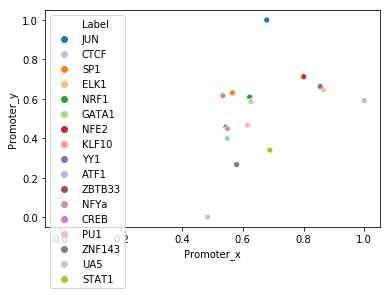

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.scatterplot(data=merged, x=merged['Promoter_x'], y=merged['Promoter_y'], hue='Label', palette='tab20')
plt.show()

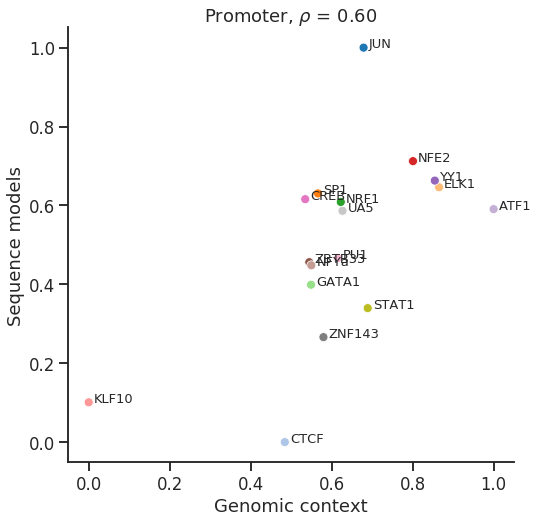

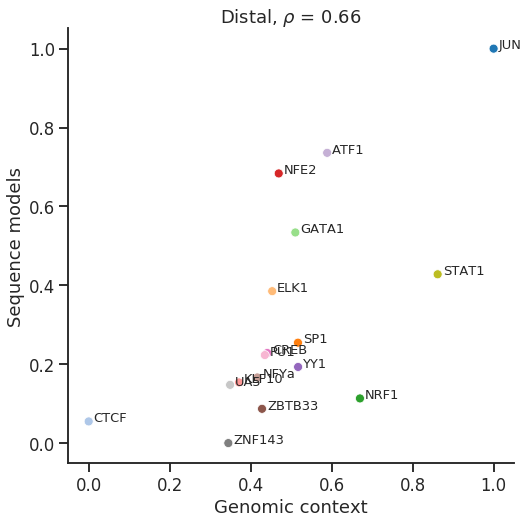

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['pdf.fonttype'] = 42

sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

rho = "\u03C1"

x_prom='Promoter_x'
y_prom='Promoter_y'
    
fig, ax = plt.subplots(figsize=[8,8])
sns.scatterplot(data=merged, x=merged['Promoter_x'], y=merged['Promoter_y'], hue='Label', palette='tab20')
for x, y, t in zip(merged[x_prom], merged[y_prom], merged['Label']):
    ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=13)
Cor = merged[x_prom].corr(merged[y_prom])
ax.legend([],[], frameon=False)

plt.xlabel('Genomic context')
plt.ylabel('Sequence models')
plt.title(r'Promoter, ${\rho}$ = %.2f'%(Cor))
sns.despine()
plt.show()

x_dist='Distal_x'
y_dist='Distal_y'
    
fig, ax = plt.subplots(figsize=[8,8])
sns.scatterplot(data=merged, x=x_dist, y=y_dist, hue='Label', palette='tab20')
for x, y, t in zip(merged[x_dist], merged[y_dist], merged['Label']):
    ax.annotate('{}'.format(t), xy=(x, y), xytext=(5, 0), ha='left', textcoords='offset points', fontsize=13)
ax.legend([],[], frameon=False)
Cor = merged[x_dist].corr(merged[y_dist])
plt.xlabel('Genomic context')
plt.ylabel('Sequence models')
plt.title(r'Distal, ${\rho}$ = %.2f'%(Cor))
sns.despine()
plt.show()



# Generate featureMatrix
##### For Gurkan's analysis

featureMatrix for each assay(ASTARR, wgSTARR, LentiMPRA, CRISPR FlowFISH) with rows indicating enhancer calls, columns indicating the TFs/Histone marks used for the heatmaps and each value in the matrix corresponds to the genomic context score calculated from the ChIPseq signals at each for the specific enhancer region. 

In [11]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=128G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.ASTARR_LentiMPRA_wgSTARR.active_vs_inactive.GC_content.V6.log \
    <<'EOF'
#!/bin/bash 
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF262TFX.ELK1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF590LGA.NRF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF398LBP.NFE2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF750TBY.KLF10.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF183YBH.KLF16.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF199FSE.ATF1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF538LAN.REST.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF106ZRO.ZEB2.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
    POLR2A \
    JUN \
    CTCF \
    SP1 \
    ELK1 \
    NRF1 \
    TAL1 \
    GATA1 \
    NFE2 \
    KLF10 \
    KLF16 \
    YY1 \
    ATF1 \
    EP300 \
    REST \
    ZEB2 \
    H3K27ac \
    H3K4me3 \
    H3K4me1 \
    ATACseq \
    ASTARR_log2 \
    WG_STARR \
    WG_STARR_log2 \
    CRISPRi_sloped400bp \
    -R \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/bin_level/ASTARR_bin_level_all_result.inactive.merged.random5000.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peaks_in_either_orientation.summits.random5000.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/element_level/lentiMPRA_element_level_all_result.inactive.merged.random5000.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/wgSTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed \
    /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/bin_level/wgSTARR_bin_level_all_result.inactive.merged.random5000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.mat.gz \
    --outFileNameMatrix /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.tab \
    --outFileSortedRegions /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.regions.bed \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.mat.gz

EOF

Submitted batch job 30709553


In [11]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.regions.bed

#chrom	start	end	name	score	strand	thickStart	thickEnd	itemRGB	blockCount	blockSizes	blockStart	deepTools_group
chr2	53617710	53617810	chr2:53617710-53617810	.	.	53617710	53617810	0	1	100	53617705	ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed
chr10	84140160	84140260	chr10:84140160-84140260	.	.	84140160	84140260	0	1	100	84140152	ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed
chr2	95551090	95551190	chr2:95551090-95551190	.	.	95551090	95551190	0	1	100	95551081	ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed
chr2	169134400	169134500	chr2:169134400-169134500	.	.	169134400	169134500	0	1	100	169134399	ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed
chr16	74296960	74297060	chr16:74296960-74297060	.	.	74296960	74297060	0	1	100	74296953	ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed
chr12	7677610	7677710	chr12:7677610-7677710	.	.	7677610	7677710	0	1	100	7677603	ASTARR_merge

In [1]:
from deeptools import heatmapper  # You need to have deeptools3 installed
import numpy as np
import gzip
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns 
from palettable.cartocolors.qualitative import Bold_10, Vivid_10_r, Antique_10_r
from matplotlib import markers
%matplotlib inline

In [2]:
hm = heatmapper.heatmapper() # create heatmapper object
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.mat.gz')
# hm.__dict__['parameters']


In [4]:
print(hm.__dict__['parameters']['sample_boundaries'])
print(hm.__dict__['parameters']['sample_labels'])

[0, 400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400, 6800, 7200, 7600, 8000, 8400, 8800, 9200, 9600]
['POLR2A', 'JUN', 'CTCF', 'SP1', 'ELK1', 'NRF1', 'TAL1', 'GATA1', 'NFE2', 'KLF10', 'KLF16', 'YY1', 'ATF1', 'EP300', 'REST', 'ZEB2', 'H3K27ac', 'H3K4me3', 'H3K4me1', 'ATACseq', 'ASTARR_log2', 'WG_STARR', 'WG_STARR_log2', 'CRISPRi_sloped400bp']


In [13]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peaks_in_either_orientation.summits.random5000.bed

5000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peaks_in_either_orientation.summits.random5000.bed


In [16]:
!mkdir -p /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix

In [3]:
import numpy as np
import pandas as pd
from deeptools import heatmapper

col_names=[]
factors=['POLR2A', 'JUN', 'CTCF', 'SP1', 'ELK1', 'NRF1', 'TAL1', 'GATA1', 'NFE2', 'KLF10', 'KLF16', 'YY1', 'ATF1', 'EP300', 'REST', 'ZEB2', 'H3K27ac', 'H3K4me3', 'H3K4me1']

hm = heatmapper.heatmapper() # create heatmapper object
hm.read_matrix_file('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/ASTARR_LentiMPRA_wgSTARR.GC_content.random5000.V6.refpoint.mat.gz')
ASTARR_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])
Lenti_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peaks_in_either_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])
wgSTARR_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/wgSTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])

for factor in factors:
    for i in range(0,400):
        col_name = factor+'_'+str(i)
        col_names.append(col_name)
        i=i+1

ASTARR_active_df = pd.DataFrame(hm.matrix.matrix[:5000, 0:7600], columns=col_names)
Lenti_active_df = pd.DataFrame(hm.matrix.matrix[9995:14993, 0:7600], columns=col_names)
wgSTARR_active_df = pd.DataFrame(hm.matrix.matrix[19991:24991, 0:7600], columns=col_names)

ASTARR_active_bed_df = pd.concat([ASTARR_bed, ASTARR_active_df], axis=1)
Lenti_active_bed_df = pd.concat([Lenti_bed, Lenti_active_df], axis=1)
wgSTARR_active_bed_df = pd.concat([wgSTARR_bed, wgSTARR_active_df], axis=1)

ASTARR_active_bed_df.to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/ASTARR_active_enhancers_random5000.ChIP_signal_matrix.txt', sep='\t', index=False)
Lenti_active_bed_df.to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/LentiMPRA_active_enhancers_random5000.ChIP_signal_matrix.txt', sep='\t', index=False)
wgSTARR_active_bed_df.to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/wgSTARR_active_enhancers_random5000.ChIP_signal_matrix.txt', sep='\t', index=False)


In [15]:
Lenti_active_df.shape

(4998, 7600)

In [7]:
wgSTARR_active_df

,POLR2A_0,POLR2A_1,POLR2A_2,POLR2A_3,POLR2A_4,POLR2A_5,POLR2A_6,POLR2A_7,POLR2A_8,POLR2A_9,...,H3K4me1_390,H3K4me1_391,H3K4me1_392,H3K4me1_393,H3K4me1_394,H3K4me1_395,H3K4me1_396,H3K4me1_397,H3K4me1_398,H3K4me1_399
0,0.000230,0.000230,0.000230,0.000230,0.000230,0.000230,0.000230,0.000230,0.000230,0.000230,...,0.145956,0.151770,0.151770,0.151770,0.149832,0.145310,0.149186,0.151770,0.151770,0.151770
1,0.009226,0.007765,0.007895,0.009510,0.009060,0.008563,0.016346,0.035240,0.035063,0.023573,...,5.883065,5.005810,6.204582,6.701109,7.308394,11.086885,11.258060,11.412600,14.261355,15.526005
2,0.118062,0.236817,0.345321,0.534664,0.665849,0.668360,0.706147,0.669761,0.513128,0.495334,...,0.099087,0.105180,0.105180,0.105180,0.106642,0.112490,0.112490,0.112490,0.117224,0.120380
3,0.021828,0.028850,0.035630,0.042410,0.052646,0.059470,0.059470,0.049234,0.035790,0.014870,...,0.462240,0.462240,0.462240,0.462240,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770
4,0.116500,0.175622,0.200960,0.200960,0.200960,0.200960,0.200960,0.167176,0.116500,0.116500,...,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770
5,0.008510,0.008510,0.008510,0.008510,0.008510,0.008510,0.008510,0.008510,0.008510,0.003918,...,0.151770,0.151770,0.151770,0.145310,0.145310,0.145310,0.123195,0.145310,0.145310,0.145310
6,0.052627,0.029351,0.005330,0.004210,0.003881,0.003967,0.004192,0.002680,0.001536,0.012946,...,0.649640,0.609710,0.423918,0.163150,0.190486,0.171570,0.164000,0.167754,0.145230,0.106200
7,3.228911,2.925724,2.152319,2.105213,1.941837,1.864090,2.010489,1.631405,1.024252,0.817508,...,1.571350,2.181725,2.760848,2.479580,2.667092,1.571350,1.366740,1.366740,1.366740,1.898516
8,0.000230,0.000230,0.000230,0.000230,0.000574,0.001950,0.001950,0.001950,0.001950,0.001950,...,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770,0.151770
9,1.791046,2.214312,2.674038,2.473897,2.465665,2.475648,3.211749,3.364960,2.319631,2.504484,...,0.386700,0.388008,0.388880,0.386498,0.384600,0.385230,0.387790,0.388662,0.387572,0.388880


#### Effect size for the active regions from Junke's pipeline. 

column 5 in merged_enhancer_peaks_in_either_orientation.bed.gz files is the meanlogFC across all bins. the logFC for each individual bin is calculated by limma voom. 


Seqnames
Start
End
Name
Mean logFC across all the bins
Strand
Z_score based on mean logFC
List of all logFCs
Summit seqnames
Summit start
Summit end
Summit logFC
Summit z-score
Peak size


In [14]:
import pandas as pd

ASTARR_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/ASTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])
Lenti_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/lentiMPRA_merged_enhancer_peaks_in_either_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])
wgSTARR_bed = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/wgSTARR_merged_enhancer_peaks_in_each_orientation.summits.random5000.bed', sep='\t', names=['chr','start','end'])

ASTARR_bed_all = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed', sep='\t', 
                             names=['Seq_chr','Seq_start','Seq_end','name','mean_logFC','strand','z_score','logFC_all','chr','start','end','summit_logFC','summit_zscore','peak_size'])
Lenti_bed_all = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/merged_peak/merged_enhancer_peaks_in_either_orientation.bed', sep='\t',
                             names=['Seq_chr','Seq_start','Seq_end','name','mean_logFC','strand','z_score','logFC_all','chr','start','end','summit_logFC','summit_zscore','peak_size'])
wgSTARR_bed_all = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/merged_peak/merged_enhancer_peaks_in_each_orientation.bed', sep='\t',
                              names=['Seq_chr','Seq_start','Seq_end','name','mean_logFC','strand','z_score','logFC_all','chr','start','end','summit_logFC','summit_zscore','peak_size'])


ASTARR_logFC = ASTARR_bed.merge(ASTARR_bed_all, on=['chr','start','end'], how='left')
Lenti_logFC = Lenti_bed.merge(Lenti_bed_all, on=['chr','start','end'], how='left')
wgSTARR_logFC = wgSTARR_bed.merge(wgSTARR_bed_all, on=['chr','start','end'], how='left')


ASTARR_logFC[['chr','start','end','summit_logFC']].drop_duplicates().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/ASTARR_enhancer_regions_with_logFC.bed', sep='\t',header=None, index=False)
Lenti_logFC[['chr','start','end','summit_logFC']].drop_duplicates().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/Lenti_enhancer_regions_with_logFC.bed', sep='\t',header=None, index=False)
wgSTARR_logFC[['chr','start','end','summit_logFC']].drop_duplicates().to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/wgSTARR_enhancer_regions_with_logFC.bed', sep='\t',header=None, index=False)



In [15]:
print(ASTARR_logFC[['chr','start','end','summit_logFC']].drop_duplicates().shape)
print(Lenti_logFC[['chr','start','end','summit_logFC']].drop_duplicates().shape)
print(wgSTARR_logFC[['chr','start','end','summit_logFC']].drop_duplicates().shape)

(5106, 4)
(5000, 4)
(5058, 4)


In [16]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/data_matrix/ASTARR_enhancer_regions_with_logFC.bed

chr2	53617710	53617810	4.67481838454338
chr10	84140160	84140260	2.7127220254011695
chr2	95551090	95551190	3.59301035197882
chr2	169134400	169134500	3.57720846145419
chr16	74296960	74297060	2.5260945783224305
chr12	7677610	7677710	3.79138077704988
chr1	112935970	112936070	3.23776435947459
chr4	186845160	186845260	2.9141324215421003
chr4	186845160	186845260	2.65366418262417
chr1	28884040	28884140	2.81822860666413


# Create an inactive set - without any activity

Create an inactive set where the inactive regions can be used as negative controls with confidence of not possessing any kind of activity - not anchored on ATAC peak calls from the inactive bins of z-score processed enhancer calls from Junke

#### Inactive bin_level regions from the pipeline - merged

In [1]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/bin_level/ASTARR_bin_level_all_result.inactive.merged.bed 
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/element_level/lentiMPRA_element_level_all_result.inactive.merged.bed
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/bin_level/wgSTARR_bin_level_all_result.inactive.merged.bed

76312 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/ASTARR/bin_level/ASTARR_bin_level_all_result.inactive.merged.bed
80261 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/lentiMPRA/element_level/lentiMPRA_element_level_all_result.inactive.merged.bed
1523295 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/wgSTARR/bin_level/wgSTARR_bin_level_all_result.inactive.merged.bed


In [19]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/
bedtools multiinter -header -names ASTARR LentiMPRA wgSTARR -i \
ASTARR/bin_level/ASTARR_bin_level_all_result.inactive.merged.bed \
lentiMPRA/element_level/lentiMPRA_element_level_all_result.inactive.merged.bed \
wgSTARR/bin_level/wgSTARR_bin_level_all_result.inactive.merged.bed \
| awk '$4==3' \
| cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR.all_assay.inactive_regions.coordinates.merged.bed

In [18]:
import pandas as pd

file = pd.read_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/z_score_processed/intersected/ASTARR_LentiMPRA_wgSTARR.3_assay.inactive_regions.merged.bed', sep='\t', names=['chr','start','end','number','assays','ASTARR','LentiMPRA','wgSTARR'])
file['len'] = file['end']-file['start']
file.sort_values(by='len')

,chr,start,end,number,assays,ASTARR,LentiMPRA,wgSTARR,len
1360,chr1,89763260,89763261,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
2663,chr1,223765329,223765330,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
9260,chr19,16660929,16660930,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
13663,chr4,56544649,56544650,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
7073,chr16,11102169,11102170,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
1594,chr1,116321950,116321951,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
6162,chr14,72963029,72963030,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
3500,chr10,72308589,72308590,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
4312,chr11,60056529,60056530,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
10847,chr2,178414030,178414031,3,"ASTARR,LentiMPRA,wgSTARR",1,1,1,1
